## Jalin Roberts | Preliminary Predictive Analytics Model.
## Stock Price Forecasting utilizing ARIMA (Auto-Regressive Integrated Moving Average).
## Purpose of Model: Forecast Adjusted Closing Price for each stock as accurately as possible.

---

## Data Preparation and Initial Analysis

### Importing Necessary Libraries
The script begins by importing various Python libraries necessary for time series analysis and model development:
- **Pandas and NumPy**: For data manipulation and handling.
- **Statsmodels**: Provides tools for statistical modeling, including the ARIMA model and statistical tests.
- **Scikit-Learn**: Offers functions for calculating model performance metrics.
- **Matplotlib, Seaborn, and Plotly**: For data visualization.
- **Warnings**: To suppress warnings during execution.

### Loading and Displaying the Data
The .csv file contains ONLY the adjusted closing price for each stock, this is for accuracy and ease-of-use

```python
# Allocate the file path correctly as per the dataset location, simply making a note of this as it is a simple mistake I have made before
data_file_path = '/Applications/Bellarmine DS Spring 2024/DS Senior Capstone/Final Project/merged_stocks_new.csv'
df = pd.read_csv(data_file_path)
df.head()
```


### General Points to Note for this model and code:
- **New File**: It's important to note that the dataset in this file only includes information for Adjusted Close Price, and as a result a new Excel file was created that contains only this information. If I were trying to predict more than one variable, I would pre-process the data differently.
- **Model Notes**: For the model fitting and evaluation, the X-Axis ranges from 0-250, this is because the testing data is around 250 (the number of trading days in a given year) This is also testing for year 2023 based on 2018-2022 training data.
- **Code Explanation and Markdown Cells**: This project is built in such a way that I will be able to understand each step of the ARIMA model building process. The notes, explanations, and code breakdown are not transferrable to all skillsets. Not all code utilized in this project is explained, and this project was built in such a way to streamline the ARIMA model building process as much as possible. Information and sources used for this project give heavily varied advice and suggestions, making the process very complicated to understand what is/is not best practice(s).
- **Complexity**: Due to the amount of conflicting information on ARIMA code, models, accuracy testing, and robustness/validity; Having a 'solid' foundation of ARIMA/SARIMAX models is not possible in this length of time. Some cells of this project contain extensive amounts of code, more than I am comfortable with having in individual code cells. This model was a 10/10 in terms of difficulty for me, and as a result I can not professional articulate every single line of code. I did my best to convey as much of the process as possible, however my learning experience with ARIMA is still very much in-progress.

### Important point to consider:
- **ARIMA Outputs**: The ARIMA outputs and subsequent plots are meant to give a visual and textual representation of model predictions. However, ARIMA does not output if the time series is stationary or other tests like autocorrelation. This has to be built and visualized. I made sure to include these in the outputs during the testing. Currently, there is not an extensive amount of comments on the results/outputs, as the purpose was to get the model to run correctly first.
---


In [1]:
pip install openpyxl

^C
ERROR: Operation cancelled by user
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Load Excel File
data_file_path = '/Applications/Bellarmine DS Spring 2024/DS Senior Capstone/Final Project/merged_stocks_new.csv'
df = pd.read_csv(data_file_path)

df['Date'] = pd.to_datetime(df['Date'])  # Parsing the 'timestamp' column
df.set_index('Date', inplace=True)           # Setting the parsed 'timestamp' as the index

# Display the first few rows of the dataset to understand its structure
df.head()

,SPY,CBSH,CSTM,IWM,META,MSFT,PWR,QQQ,SRE,TSLA
Date,,,,,,,,,,
2018-01-02,243.072281,43.791382,11.45,142.351120,181.419998,80.229004,38.584988,152.072769,36.394047,21.368668
2018-01-03,244.609741,43.611351,11.65,142.499130,184.669998,80.602371,38.889820,153.550415,37.357880,21.150000
2018-01-04,245.640732,43.564407,11.95,142.878372,184.330002,81.311806,39.194633,153.819077,37.109146,20.974667
2018-01-05,247.277756,43.900959,11.80,143.174377,186.850006,82.319908,38.850483,155.363892,37.464970,21.105333
2018-01-08,247.729965,43.619186,11.85,143.396408,188.279999,82.403931,38.447323,155.968353,37.475334,22.427334


In [ ]:
len(df['SPY'])

This section of the script focuses on dynamically creating visualizations for each numeric column in the dataset:

---

## Dynamic Visualization of Numeric Columns

### Identifying Numeric Columns
The script begins by identifying all numeric columns in the DataFrame, excluding the timestamp column (which is now the index):

```python
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
```

This step ensures that only relevant columns (i.e., those containing numeric data suitable for time series analysis) are considered for visualization.

### Preparing Subplots
The script dynamically creates a subplot for each numeric column:

```python
num_columns = len(numeric_columns)  # Calculating the number of numeric columns
fig, axs = plt.subplots(num_columns, 1, figsize=(10, 5 * num_columns))  # Creating subplots

if num_columns == 1:
    axs = [axs]  # Handling the case where there is only one numeric column
```

This approach allows for flexibility in handling datasets with varying numbers of numeric columns, ensuring that each is given individual attention in the visualization process.

### Plotting Each Numeric Column
For each numeric column, a line plot is created:

```python
for i, col in enumerate(numeric_columns):
    df[col].plot(ax=axs[i], color='blue')  # Plotting the column
    axs[i].set_title(col)                  # Setting the title for each subplot
    axs[i].set_xlabel('Timestamp')         # Labeling the x-axis
    axs[i].set_ylabel('Value')             # Labeling the y-axis
```

This loop ensures that each numeric column in the DataFrame is visualized separately, providing a clear and detailed view of each time series.

### Visualization Output
- **Individual Plots for Each Numeric Column**: The script generates individual plots for each numeric column, making it easier to analyze each time series independently.
- **Customization**: Each subplot is customized with appropriate titles and axis labels, enhancing the clarity of the information presented.
- **Layout Adjustments**: The layout is adjusted to ensure that the plots are neatly organized and easily interpretable.

### Significance
This dynamic approach to visualization is particularly useful in datasets with multiple time series data columns. It allows for a comprehensive analysis, enabling the identification of unique characteristics and patterns in each time series.

---

In [ ]:
# Identifying numeric columns (excluding the timestamp column if it's there)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Number of numeric columns
num_columns = len(numeric_columns)

# Create the figure with dynamic subplots based on the number of numeric columns
fig, axs = plt.subplots(num_columns, 1, figsize=(10, 5 * num_columns))

# Check if there's only one numeric column (to handle subplot indexing)
if num_columns == 1:
    axs = [axs]

# Loop through the numeric columns and create a plot for each
for i, col in enumerate(numeric_columns):
    df[col].plot(ax=axs[i], color='blue')
    axs[i].set_title(col)
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

This part of the script focuses on preparing for the model fitting and evaluation phase of the ARIMA model:

---

## Preparation for Model Fitting and Evaluation

### Extracting Column Names
The script starts by extracting the names of all columns in the DataFrame:

```python
variables = list(df.columns)
```

This step is essential if the DataFrame contains multiple columns of interest.

### Setting up Storage for Models and Errors
The script then initializes lists to store the models and various error metrics for each variable:

```python
models = []       # List to store the ARIMA models
rmse_multi = []   # List to store the Root Mean Square Errors (RMSE)
mae_multi = []    # List to store the Mean Absolute Errors (MAE)
ape_multi = []    # List to store the Absolute Percentage Errors (APE)
```

These lists will be used to store the results from the ARIMA models fitted to each variable in the DataFrame. This help for comparing the performance of models across different time series variables.

### Key Points

- **Model Storage**: `models` list will hold the ARIMA models created for each variable, allowing for easy access and comparison of different model configurations.
- **Error Metrics**: The `rmse_multi`, `mae_multi`, and `ape_multi` lists are crucial for evaluating and comparing the performance of the ARIMA models on different variables. These metrics will provide insights into the accuracy and reliability of the models.
    - **RMSE (Root Mean Square Error)**: Measures the model's prediction error.
    - **MAE (Mean Absolute Error)**: Evaluates the average magnitude of the errors in a set of predictions.
    - **APE (Absolute Percentage Error)**: Represents the error as a percentage, which can be particularly useful for understanding the relative size of the errors in terms of the actual values.

### Significance
This step is crucial for a dynamic and systematic approach to model fitting and evaluation. By organizing the storage of models and their corresponding error metrics, the script sets the stage for an in depth analysis of the ARIMA models' performance across different time series variables in the dataset.

---

In [4]:
# Get the column names of the DataFrame
variables = df.columns 
variables = list(df.columns)
variables

# Store models, predictions and errors
models = []  # List to store the models
rmse_multi = []  # List to store the root mean square errors (RMSE)
mae_multi = []  # List to store the mean absolute errors (MAE)
ape_multi = []  # List to store the absolute percentage errors for each variable


---

## ARIMA Model Fitting and Evaluation for Each Variable

### Iterating through Variables
The script iterates through each variable (column) in the DataFrame to fit an ARIMA model:

```python
for var in variables:
    ...
```

### Model Selection via Grid Search
- **Grid Search for (p, d, q) Values**: The script performs a grid search over possible combinations of (p, d, q) orders, fitting an ARIMA model for each combination.
- **Building the script to find these values**: Due to having multiple time series (more than 1 stock), every individual time series requires different p, d, and q values in order to best fit the model and ensure best accuracy. This is the only way I could find that subsequently served as a huge time saver, and is likely best practice when handling more than one time-series.
- **Selection Criterion**: The Akaike Information Criterion (AIC) is used to select the best model. A lower AIC value indicates a better model fit. This is used as the criteria focus on the forecasting and predictive power of the model

### Visualization of ACF and PACF
- **Autocorrelation and Partial Autocorrelation Plots**: For the best model, the script generates plots of the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF). These plots help in understanding the correlation structure of the time series.

### Residual Analysis
- **Stationarity Test of Residuals (ADF Test)**: The script uses the Augmented Dickey-Fuller (ADF) test to check if the residuals of the fitted model are stationary.
- **Autocorrelation Test of Residuals (Ljung-Box Test)**: The Ljung-Box test checks for the presence of autocorrelation in the residuals at different lags.

### Predictions and Error Calculation
- **Forecasting**: The script forecasts future values using the best ARIMA model and compares these forecasts with the actual values.
- **Error Metrics**: Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) are calculated to evaluate the prediction accuracy. Absolute Percentage Error (APE) is also computed for each forecasted value.

### Visualization of Predictions and Errors
- **Prediction Plot**: The script uses Plotly to create a dynamic plot showing the actual values, predicted values, and the confidence interval.
- **Error Plot**: A bar plot visualizes the Absolute Percentage Error for each forecasted point.

### Key Points
- **Dynamic Approach**: The script's ability to handle multiple variables in a dataset makes it versatile for different time series datasets.
- **Comprehensive Evaluation**: Each ARIMA model is thoroughly evaluated using statistical tests, error metrics, and visualizations, ensuring a robust analysis.

### Significance
This process is crucial for developing reliable ARIMA models for each variable in the dataset. By systematically selecting, fitting, and evaluating the models, the script ensures accurate and trustworthy forecasts.

---

Structure of The ARIMA Model For SPY: (2, 1, 2)


Model Summary:
                               SARIMAX Results                                
Dep. Variable:                    SPY   No. Observations:                 1509
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4242.003
Date:                Tue, 23 Apr 2024   AIC                           8494.007
Time:                        10:42:15   BIC                           8520.599
Sample:                             0   HQIC                          8503.911
                               - 1509                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7673      0.027    -65.975      0.000      -1.820      -1.715
ar.L2         -0.8878      0.025    -35.371      0.000      -0.937

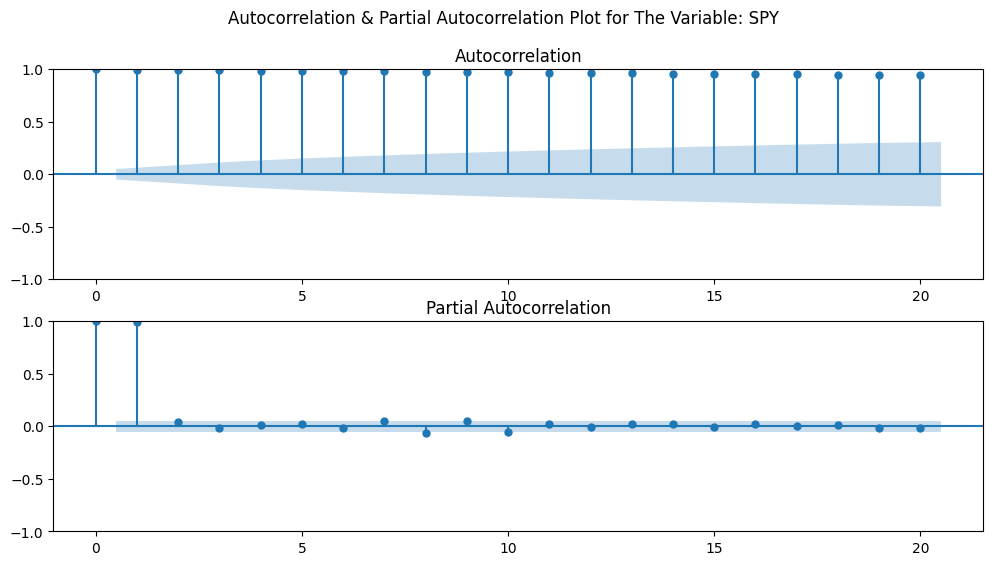



Test of if the Residuals Are Stationary Using the ADF Test:
ADF Statistic: -71.06596164704726
p-value: 0.0
The residuals are stationary.


Test of if No Autocorrelation Using the Ljung-Box Test:
Ljung-Box Statistic: 0.8452942961534627
p-value: 0.9999208346142213
There is no significant autocorrelation in the residuals.


Prediction vs Observed Values:
predicted=377.868465, expected=375.118713
predicted=374.463271, expected=378.014709
predicted=378.152613, expected=373.700256
predicted=374.016024, expected=382.270020
predicted=381.407320, expected=382.053314
predicted=382.415884, expected=384.732605
predicted=384.607695, expected=389.598602
predicted=388.878037, expected=391.017090
predicted=391.717758, expected=392.533997
predicted=391.658244, expected=391.814941
predicted=392.642969, expected=385.628937
predicted=385.444985, expected=382.821655
predicted=383.295336, expected=389.953278
predicted=389.051116, expected=394.632141
predicted=394.742984, expected=394.208557
predicted=394.

KeyboardInterrupt: 

In [5]:
# Creating a dictionary to store residuals for each variable
residuals_dict = {}

# Iterating through all variables to fit an ARIMA model for each
for var in variables:
    best_aic = np.inf  # Variable to store the best AIC value
    best_order = None  # Variable to store the best (p, d, q) order
    best_model = None  # Variable to store the best ARIMA model
    best_model_fit = None  # Variable to store the fit of the best model
    
    # Grid search for p, d, q values
    for p in range(3):
        for d in range(3):
            for q in range(3):
                try:
                    # Fit an ARIMA model with the current (p, d, q) order
                    temp_model = ARIMA(df[var].dropna(), order=(p, d, q))
                    temp_model_fit = temp_model.fit()
                    temp_aic = temp_model_fit.aic

                    # Update the best model if the current AIC is better
                    if temp_aic < best_aic:
                        best_aic = temp_aic
                        best_order = (p, d, q)
                        best_model = temp_model
                        best_model_fit = temp_model_fit  # Save the fit model
                except:
                    continue

    models.append(best_model)
    
    # Save the residuals for the current variable
    residuals_dict[var] = best_model_fit.resid

    # Print the structure of the best ARIMA model for the current variable
    print(f"\033[1mStructure of The ARIMA Model For {var}: {best_order}\033[0m")
    print("\n")

    # Print the summary of the best ARIMA model
    print(f"\033[1mModel Summary:\033[0m")
    print(best_model_fit.summary())
    print("\n")

    # Plotting the ACF and PACF for the best model
    print("\033[1mPlotting the ACF and PACF:\033[0m")
    plt.figure(figsize=(12, 6))
    plt.suptitle('Autocorrelation & Partial Autocorrelation Plot for The Variable: ' + var)

    plt.subplot(211)
    plot_acf(df[var].dropna(), lags=20, ax=plt.gca())

    plt.subplot(212)
    plot_pacf(df[var].dropna(), lags=20, ax=plt.gca())

    plt.show()
    print("\n")

    # Test for stationarity of residuals using ADF test
    print("\033[1mTest of if the Residuals Are Stationary Using the ADF Test:\033[0m")
    adf_result = adfuller(best_model_fit.resid)
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    if adf_result[1] < 0.05:
        print("The residuals are stationary.")
    else:
        print("The residuals are not stationary.")
    print("\n")

    # Test for autocorrelation in residuals using Ljung-Box test
    print("\033[1mTest of if No Autocorrelation Using the Ljung-Box Test:\033[0m")
    lb_test = acorr_ljungbox(best_model_fit.resid, lags=[10], return_df=True)
    print(f"Ljung-Box Statistic: {lb_test['lb_stat'].values[0]}")
    print(f"p-value: {lb_test['lb_pvalue'].values[0]}")
    if lb_test['lb_pvalue'].values[0] > 0.05:
        print("There is no significant autocorrelation in the residuals.")
    else:
        print("There is significant autocorrelation in the residuals.")
    print("\n")

    # Predictions
    print("\033[1mPrediction vs Observed Values:\033[0m")
    history = [x for x in df[var].dropna()[:-250]]  # Training data points
    test = [x for x in df[var].dropna()[1259:]]  # Test data points
    predictions = []
    ape = []  # List to store the absolute percentage errors for the current variable
    lower_ci, upper_ci = [], []  # lists to store lower and upper confidence intervals

    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.get_prediction(start=len(history), dynamic=False)  # perform forecast
        pred_df = output.summary_frame(alpha=0.05)  # Summary dataframe
        yhat = pred_df['mean'].values[0]  # Predicted value
        lower = pred_df['mean_ci_lower'].values[0]  # lower bound of confidence interval
        upper = pred_df['mean_ci_upper'].values[0]  # upper bound of confidence interval
        predictions.append(yhat)
        lower_ci.append(lower)
        upper_ci.append(upper)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        ape.append(abs((obs - yhat) / obs) * 100)  # Calculate the APE and add it to the list
        
    ape_multi.append(ape)  # Store the list of APEs for the current variable

    # Calculate the RMSE, MAE, and APE
    rmse = sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    rmse_multi.append(rmse)
    mae_multi.append(mae)

    # Print prediction performance and results for the current variable
    print("\n")
    print("\033[1mPrediction Performance & Results:\033[0m")
    print(f"Item: {var}")
    print(f"Best ARIMA Structure is: {best_order}")
    print(f"Best AIC found is: {best_aic}")
    print(f"The RMSE of the predictions is: {rmse}")
    print(f"Mean Absolute Percentage Error of the prediction is: {np.mean(ape)}%")

    # Plotting the predictions
    trace1 = go.Scatter(
        x=list(range(len(test))),
        y=test,
        mode='lines',
        name='Test Data',
        line=dict(color='skyblue', width=2.5)
    )

    # Create a trace for predicted data
    trace2 = go.Scatter(
        x=list(range(len(predictions))),
        y=predictions,
        mode='lines',
        name='Predicted Data',
        line=dict(color='red', width=2.5, dash='dash')
    )

    # Create a trace for the confidence interval
    trace3 = go.Scatter(
        x=list(range(len(predictions))) + list(range(len(predictions)))[::-1],  # x, then x reversed
        y=upper_ci + lower_ci[::-1],  # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(255, 105, 180, 0.3)',  # lightpink with alpha 0.3
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        name='95% Confidence Interval',
        showlegend=False
    )

    data = [trace1, trace2, trace3]

    layout = go.Layout(
        title=dict(
            text=f'{var} vs Predicted {var} with Confidence Interval',
            x=0.5,
            font=dict(
                size=20
            )
        ),
        xaxis=dict(
            title='Time',
            titlefont=dict(
                size=15
            )
        ),
        yaxis=dict(
            title=var,
            titlefont=dict(
                size=15
            )
        ),
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()
    
    # Reducing the number of x-ticks by only showing every nth label
    n = 5  # Show every 5th label

    # Plotting absolute percentage errors for the current variable over the test period
    plt.figure(figsize=(12, 6))

    # Generate a colormap for the errors
    colors = cm.rainbow(np.linspace(0, 1, len(ape)))

    # Create the bar plot
    plt.bar(range(len(ape)), ape, color=colors)

    plt.title(f'Percentage Error for {var} Over The Test Period 2023')
    plt.xlabel('Observations')
    plt.ylabel('Absolute Percentage Error')

    # Formatting the y-axis to display as percentages
    fmt = '{x:,.1f}%'
    tick = mtick.StrMethodFormatter(fmt)
    plt.gca().yaxis.set_major_formatter(tick)
    
    # Rotate the x-axis labels to make them more readable
    plt.xticks(rotation=90)

    # Ensuring that x-axis labels are integers
    #xticks = np.arange(len(ape))
   # plt.xticks(xticks, xticks.astype(int))
    
    # Set x-ticks to only display every nth label
    xticks = np.arange(0, len(ape), n)
    plt.xticks(xticks, xticks.astype(int))
    
    plt.tight_layout()  # Adjust the padding between and around subplots.

    plt.show()


This part of the script is focused on exporting the residuals of each ARIMA model to Excel files:

---

## Exporting Model Residuals to Excel

### Process Overview
Upon completing the ARIMA model fitting and evaluation for each variable, the script exports the residuals of these models to individual Excel files. These files can be used for further analysis of the residuals. 

### Code Explanation
```python
for var, residuals in residuals_dict.items():
    ...
```

- **Iterating Through Residuals**: The script iterates through a dictionary `residuals_dict`, which  contain the residuals of the ARIMA models keyed by variable name.
- **Creating DataFrame for Residuals**: For each variable, a new DataFrame is created with the residuals.
- **Exporting to Excel**: The residuals DataFrame is then saved to an Excel file. The filename is based on the variable name, making it easy to identify the corresponding model's residuals.

### Key Points
- **File Naming Convention**: The use of the variable name in the filename (`"{var}_residuals.xlsx"`) ensures clarity and helps in maintaining an organized workspace, especially when dealing with multiple variables.

### Example Output
- For each variable in the dataset, an Excel file is generated, named appropriately (e.g., `SPY_residuals.xlsx`), containing the residuals from the ARIMA model.
- The script also prints a confirmation message for each file created, like `Residuals for SPY saved to SPY_residuals.xlsx`.

### Significance
Exporting the residuals match the request to have residuals saved for later use. Other types of regression can be performed, so this is done in the possibility of this.

---

In [ ]:
# Export residuals to Excel files after completing the loop for all variables
for var, residuals in residuals_dict.items():
    residuals_df = pd.DataFrame(residuals, columns=['Residuals'])
    residuals_df.to_excel(f"{var}_residuals.xlsx", index=False)
    print(f"Residuals for {var} saved to {var}_residuals.xlsx")

This section of the script involves forecasting future values using the fitted ARIMA models for each variable in the dataset, storing these forecasts along with their confidence intervals, and then visualizing the results:

---

## Forecasting and Visualization of Future Values

### Forecasting Process
- **Initialization**: The script starts by creating empty dictionaries to store forecasted values, lower bounds, and upper bounds for each variable.
- **Forecasting Loop**:
    - The script iterates through each variable and its corresponding fitted ARIMA model.
    - For each model, it performs a forecast for 24 values ahead (or any specified number of future time points).
    - The forecasted values (point forecasts) and the 95% confidence intervals (lower and upper bounds) are extracted and stored in the respective dictionaries.

### Conversion to DataFrames
- **Data Organization**: The forecasted values and confidence intervals stored in dictionaries are converted into Pandas DataFrames for easier handling and visualization:
    - `forecasted_df`: DataFrame containing the forecasted values.
    - `lower_bounds_df` and `upper_bounds_df`: DataFrames containing the lower and upper bounds of the confidence intervals.

### Visualization of Forecasts
- **Plotting Forecasts**:
    - The script generates a plot for each variable.
    - It plots the forecasted values and shades the area between the lower and upper bounds, representing the 95% confidence interval.

```python
for var in variables:
    ...
    plt.plot(forecasted_df[var], label='Forecast')  # Plotting the forecasted values
    plt.fill_between(lower_bounds_df.index, lower_bounds_df[var], upper_bounds_df[var], color='k', alpha=.2)  # Confidence interval
    ...
```

- **Customization**: Each plot is customized with a title indicating the variable name and includes a legend.

### Key Points
- **Long-term Forecasting**: Ability to forecast several values ahead.
- **Confidence Intervals**: Including confidence intervals in the forecasts provides a measure of the uncertainty associated with the predictions.
- **Visualization**: The visual representation of forecasts with confidence intervals give an intuitive understanding of expected future trends and the range of possible outcomes.

In [ ]:
# Create empty dictionaries to store forecasted values, lower bounds, and upper bounds
forecasted_data = {}
lower_bounds = {}
upper_bounds = {}

# Forecasting 24 months ahead for each variable
for var, model in zip(variables, models):
    model_fit = model.fit()  # Fit the ARIMA model
    forecasted_values = model_fit.get_forecast(steps=24)  # Get the forecast for 24 months ahead

    # Save point forecasts
    forecasted_data[var] = forecasted_values.predicted_mean

    # Save confidence intervals
    ci = forecasted_values.conf_int(alpha=0.05)
    lower_bounds[var] = ci.iloc[:, 0]
    upper_bounds[var] = ci.iloc[:, 1]

# Convert the dictionaries to DataFrames
forecasted_df = pd.DataFrame(forecasted_data)
lower_bounds_df = pd.DataFrame(lower_bounds)
upper_bounds_df = pd.DataFrame(upper_bounds)

# Plotting the forecasts with confidence intervals
for var in variables:
    plt.figure(figsize=(10, 5))
    plt.plot(forecasted_df[var], label='Forecast')  # Plot the forecasted values
    plt.fill_between(lower_bounds_df.index, lower_bounds_df[var], upper_bounds_df[var], color='k', alpha=.2)  # Fill the area between lower and upper bounds
    plt.title(f'Forecast for {var} with 95% confidence interval')
    plt.legend()
    plt.show()

This final section of the script involves creating a combined DataFrame for each variable that includes the forecasted values along with their confidence intervals and then exporting these combined DataFrames to Excel files:

---

## Exporting Forecasts with Confidence Intervals to Excel

### Creating Combined DataFrames
- **Combining Forecast and Confidence Intervals**: For each variable, a new DataFrame `combined_df` is created that includes the forecasted values, lower bounds, and upper bounds of the confidence intervals.
- **DataFrame Structure**: Each `combined_df` contains the following columns:
    - `'Forecasted Value'`: The forecasted values from the ARIMA model.
    - `'Lower Bound'` and `'Upper Bound'`: The lower and upper bounds of the 95% confidence intervals.

### Exporting to Excel
- **File Creation**: Each combined DataFrame is exported to an Excel file using the `to_excel` method. The filename is based on the variable name, making it easy to identify (e.g., `SPY_forecast_with_confidence_intervals.xlsx`).
- **Confirmation Message**: After exporting each DataFrame, the script prints a confirmation message indicating the successful creation of the Excel file.

```python
for var in variables:
    ...
    combined_df.to_excel(f"{var}_forecast_with_confidence_intervals.xlsx", index=False)
    print(f"Forecast for {var} with confidence intervals saved to {var}_forecast_with_confidence_intervals.xlsx")
```

### Key Points
- **Organized Data Export**: The script systematically exports the forecast data for each variable, along with its confidence intervals, into separate, well-organized Excel files.
- **Ease of Access and Use**: Exporting to Excel files allows for easy access and further use of the forecast data, be it for presentation, analysis, or integration into other systems.

In [ ]:
# Creating combined DataFrame and exporting to Excel
for var in variables:
    combined_df = pd.DataFrame({
        'Forecasted Value': forecasted_df[var],
        'Lower Bound': lower_bounds_df[var],
        'Upper Bound': upper_bounds_df[var]
    })
    
    print("\n")  # Newline for better readability
    
    print(combined_df)
    
    print("\n")  # Newline for better readability

    # Exporting to Excel

    # Exporting to Excel
    combined_df.to_excel(f"{var}_forecast_with_confidence_intervals.xlsx", index=False)

    # Optionally, print a message to confirm saving
    print(f"Forecast for {var} with confidence intervals saved to {var}_forecast_with_confidence_intervals.xlsx")

---

## Conclusion // Final Thoughts

### This ARIMA model is an extremely powerful tool that can be used to forecast stock data with high degree of accuracy. 
The script begins by importing various Python libraries necessary for time series analysis and model development:
- **Seasonality**: This issue seems to be possible for stocks and certain time series data. This could be something to consider in the future if I wanted to attempt to get even more accurate predictions.
- **Unpredictability**: Forecasting stock data alwyas contains a margin of error, and even to some extent some guessing. This model (in its current form) is likely not going to be the most useful way to invest in the stock market. However, it does give me some confidence that my choices would be worth picking.
- **Autocorrelation**: This is something that is technically present in some stocks' data such as Microsoft. In two observations in the Microsoft ARIMA, the Margin of Error jumps to 12.5% and 17.5%, I am not completely sure what this is, or even why. However it is possible that autocorrelation is present elsewhere that the model did not pick up? This does not necessarily mean that the presence of autocorrelation is a bad thing. There was also some autocorrelation for QQQ, Telsa, and Meta as well, however it was not significant enough to be a major problem in forecasting accuracy. I wonder if the high jump in forecasting percentage for single observations could be influencing this.
- **Replicability**: The benefit to this model is that it can be used over and over again, and with some extra work could even forecast information into the next year (2024). This was not originally apart of the goal and purpose of this model, so it will not be included in this.
- **Ease of Use**: ARIMA is not very user friendly, and requires more statistical understanding than originally thought. Having worked with this model and fought with it to get it to work correctly did not make me feel very confident after all was said and done. 
- **Learning Experiences**: Having such a difficult model to learn created a hyper-organized setting in which I was able to operate. I have never needed to organize my thoughts, processes, and nuances to the degree this project has been commented. This is not standard practice for me, but took this level of organization to work through the learning curve.
- **Similarity to Linear Regression**: ARIMA has a lot of similarities with the process I am familiar with in the context of linear regression in an Econometrics setting. Though the code and nuances differ, I noticed quickly that the process does look and feel the same with both methods. ARIMA is, however, much more robust and complex.


---


## Sources, References, and Relevant Projects:
- Chat GPT was not useful in building this project, and as a result was not able to serve as a tool for this project. If I had more of a solid programming foundation and experience with this particular type of model, I may be able to navigate simple errors and nuances more effectively. However, Chat GPT has many limitations, especially when it comes to building more in-depth models such as this. Without wanting to add more headache to an already extremely time-consuming project, I decided it would not be beneficial to refer to.


Sources:
- https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp#:~:text=An%20autoregressive%20integrated%20moving%20average%2C%20or%20ARIMA%2C%20is%20a%20statistical,values%20based%20on%20past%20values.
- https://towardsdatascience.com/what-is-an-arima-model-9e200f06f9eb
- https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/
- https://www.projectpro.io/article/how-to-build-arima-model-in-python/544
- https://stackoverflow.com/questions/33661762/python-statsmodels-arima-forecast?rq=3
- https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

References:
- https://stats.stackexchange.com/questions/281666/how-does-acf-pacf-identify-the-order-of-ma-and-ar-terms
- https://en.wikipedia.org/wiki/Ljung–Box_test
- https://docs.python.org/3/tutorial/index.html

Relevant Projects:
- https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima
- https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting
- https://www.kaggle.com/code/tanmay111999/air-passenger-forecast-arima-sarima
- Personal projects from Econometrics (ECON-410) such as linear regression and relevant statistical models in Excel.

Youtube Tutorials/Videos Related to ARIMA:
- https://www.youtube.com/watch?v=tr8PF2v9Wgo
- https://www.youtube.com/watch?v=_qv_7lEuiZg
- https://www.youtube.com/watch?v=O5pataOw33Y&t=1067s
- https://youtu.be/pryXhOgDY9A?si=L7D3KXd-GKdn1DEZ
- https://www.youtube.com/watch?v=xHFRm52cirQ
- https://www.youtube.com/watch?v=CAT0Y66nPhs